In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import librosa

from shared.utils import *
from shared.local_path import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Data Preparation & Preprocessing
## Audio Data

In [2]:
label = []
filepath = []

for classes in os.listdir(AUDIO_PATH):
    for file in os.listdir(os.path.join(AUDIO_PATH, classes)):
        file_path = os.path.join(AUDIO_PATH, classes, file)

        filepath.append(file_path)
        label.append(classes)

audio = pd.DataFrame({
    'filepath': filepath,
    'label': label,
})

audio.head()

,filepath,label
0,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
1,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
2,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
3,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
4,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry


In [3]:
le = LabelEncoder()
le.fit(audio['label'])
audio['label_encoded'] = le.transform(audio['label'])
num_classes = len(le.classes_)

In [4]:
audio.head()

,filepath,label,label_encoded
0,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,0
1,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,0
2,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,0
3,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,0
4,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry,0


In [5]:
audio.label_encoded.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [6]:
with tf.device('/GPU:0'):
    audio['data'] = audio.filepath.apply(preprocess_audio)

C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=96
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1472
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1056
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1792
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=320
  warnings.w

In [7]:
audio['data'][0].shape

(128, 110, 3)

In [8]:
del filepath, label

In [9]:
x_audio = np.stack(audio['data'].values)
y_audio = audio['label_encoded'].values

In [10]:
x_audio.shape

(27406, 128, 110, 3)

In [11]:
del audio

In [12]:
x_audio_train, x_temp, y_audio_train, y_temp = train_test_split(
    x_audio, y_audio, test_size=0.4, random_state=42, stratify=y_audio
)

x_audio_val, x_audio_test, y_audio_val, y_audio_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [13]:
del x_audio, y_audio

In [14]:
x_audio_train.shape

(16443, 128, 110, 3)

In [15]:
x_audio_train.shape[0] == len(y_audio_train)

True

## Image data


In [16]:
filepath = []
label = []

i = 0
for classes in os.listdir(TRAIN_IMAGE_PATH):
    for file in os.listdir(os.path.join(TRAIN_IMAGE_PATH, classes)):
        path = os.path.join(TRAIN_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

train_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(train_df.shape)
print(train_df['label'].unique())
train_df.head()

(28709, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\train\angry\Training...,angry
1,E:\\Skripsi\data\new_data\train\angry\Training...,angry
2,E:\\Skripsi\data\new_data\train\angry\Training...,angry
3,E:\\Skripsi\data\new_data\train\angry\Training...,angry
4,E:\\Skripsi\data\new_data\train\angry\Training...,angry


In [17]:
filepath = []
label = []

i = 0
for classes in os.listdir(TEST_IMAGE_PATH):
    for file in os.listdir(os.path.join(TEST_IMAGE_PATH, classes)):
        path = os.path.join(TEST_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

img_test_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(img_test_df.shape)
print(img_test_df['label'].unique())
img_test_df.head()

(7311, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\test\angry\Anger.jpg,angry
1,E:\\Skripsi\data\new_data\test\angry\Anger_1.jpg,angry
2,E:\\Skripsi\data\new_data\test\angry\Anger_10.jpg,angry
3,E:\\Skripsi\data\new_data\test\angry\Anger_11.jpg,angry
4,E:\\Skripsi\data\new_data\test\angry\Anger_12.jpg,angry


In [18]:
le = LabelEncoder()
le.fit(train_df['label'])
train_df['label_encoded'] = le.transform(train_df['label'])
img_test_df['label_encoded'] = le.transform(img_test_df['label'])

In [19]:
with tf.device('/GPU:0'):
    train_df['data'] = train_df['filepath'].apply(preprocess_image)
    img_test_df['data'] = img_test_df['filepath'].apply(preprocess_image)

In [20]:
train_df.shape

(28709, 4)

In [21]:
x_img = np.stack(train_df['data'].values)
y_img = train_df['label_encoded'].values

x_img_test = np.stack(img_test_df['data'].values)
y_img_test = img_test_df['label_encoded'].values

In [22]:
del train_df, img_test_df

In [23]:
x_img.shape[1:] == x_img_test.shape[1:]

True

In [24]:
x_img.shape

(28709, 128, 110, 3)

In [ ]:
x_img_train, x_img_val, y_img_train, y_img_val = train_test_split(x_img, y_img, test_size=0.2, random_state=42, stratify=y_img)
del x_img, y_img

# Modelling

In [25]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', pooling="max", input_shape=(256, 110, 3))

In [26]:
input_image = tf.keras.layers.Input(shape=(128, 110, 3), name='input_image')
input_audio = tf.keras.layers.Input(shape=(128, 110, 3), name='input_audio')

inputs = tf.keras.layers.Concatenate(axis=1)([input_image, input_audio])

x1 = base_model(inputs)
flat = tf.keras.layers.Flatten()(x1)
fc1 = tf.keras.layers.Dense(512, activation='relu')(flat)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)

out1 = tf.keras.layers.Dense(8, activation='softmax', name='image_class')(fc2)
out2 = tf.keras.layers.Dense(7, activation='softmax', name='audio_class')(fc2)

model = tf.keras.models.Model(inputs=[input_image, input_audio], outputs=[out1, out2])

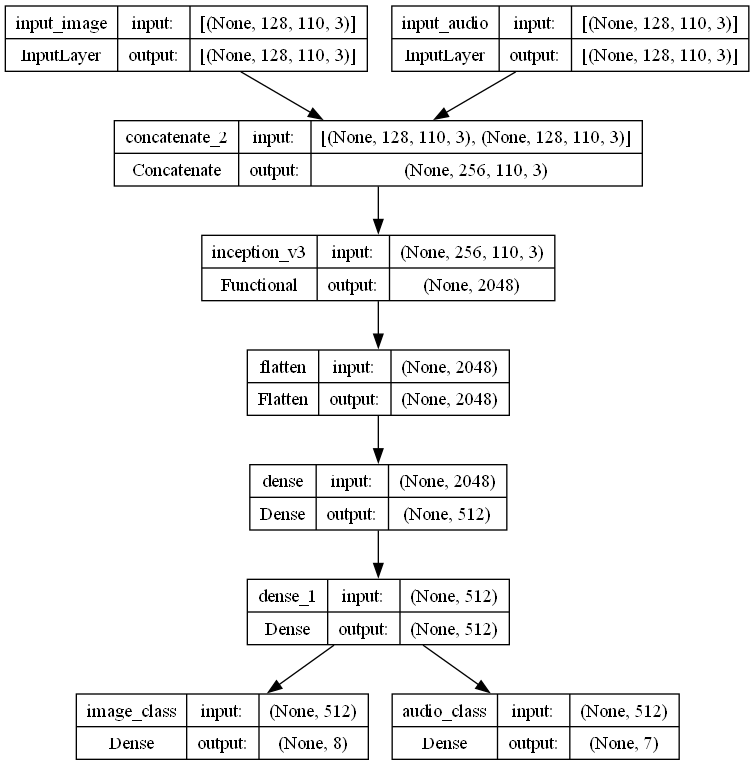

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.),
    loss={
        'image_class': 'sparse_categorical_crossentropy',
        'audio_class': 'sparse_categorical_crossentropy'
    },
    metrics={
        'image_class': 'accuracy',
        'audio_class': 'accuracy' 
    }
)

In [29]:
min_samples = min(len(x_img_train), len(x_audio_train), len(y_img_train), len(y_audio_train))

# Filter inputs and labels
x_img_train = x_img_train[:min_samples]
x_audio_train = x_audio_train[:min_samples]
y_img_train = y_img_train[:min_samples]
y_audio_train = y_audio_train[:min_samples]

# Print shapes after filtering
print("Input Image Shape:", x_img_train.shape) 
print("Input Audio Shape:", x_audio_train.shape)  
print("Image Labels Shape:", y_img_train.shape) 
print("Audio Labels Shape:", y_audio_train.shape)

Input Image Shape: (16443, 128, 110, 3)
Input Audio Shape: (16443, 128, 110, 3)
Image Labels Shape: (16443,)
Audio Labels Shape: (16443,)


In [30]:
print("Input Image Type:", x_img_train.dtype) 
print("Input Audio Type:", x_audio_train.dtype)  
print("Image Labels Type:", y_img_train.dtype) 
print("Audio Labels Type:", y_audio_train.dtype)

Input Image Type: uint8
Input Audio Type: float32
Image Labels Type: int32
Audio Labels Type: int32


In [ ]:
min_samples = min(len(x_img_val), len(x_audio_val), len(y_img_val), len(y_audio_val))

x_img_val = x_img_val[:min_samples]
x_audio_val = x_audio_val[:min_samples]
y_img_val = y_img_val[:min_samples]
y_audio_val = y_audio_val[:min_samples]

In [ ]:
class EarlyStop(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') < .35:
            self.model.stop_training = True

In [31]:
history = model.fit(
    x=[x_img_train, x_audio_train],
    y=[y_img_train, y_audio_train], 
    validation_data=(
        [x_img_val, x_audio_val], 
        [y_img_val, y_audio_val]  
    ),
    callbacks=EarlyStop(),
    epochs=50, 
    batch_size=32  
)


Epoch 1/10
514/514 [==============================] - ETA: 0s - loss: nan - image_class_loss: nan - audio_class_loss: nan - image_class_accuracy: 0.2427 - audio_class_accuracy: 0.1578

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
model.save('model.h5')

In [ ]:
def plot_and_save(metric_name, history, ylabel, filename):
    plt.figure()
    plt.plot(history.history[metric_name], label=f'Train {ylabel}')
    if f'val_{metric_name}' in history.history:
        plt.plot(history.history[f'val_{metric_name}'], label=f'Val {ylabel}')
    plt.title(f'{ylabel} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.close()

In [ ]:
plot_and_save('loss', history, 'Loss', 'loss_plot.png')

plot_and_save('image_class_loss', history, 'Image Classification Loss', 'image_class_loss_plot.png')

plot_and_save('audio_class_loss', history, 'Audio Classification Loss', 'audio_class_loss_plot.png')

plot_and_save('image_class_accuracy', history, 'Image Classification Accuracy', 'image_class_accuracy_plot.png')

plot_and_save('audio_class_accuracy', history, 'Audio Classification Accuracy', 'audio_class_accuracy_plot.png')